   TRAINING RESEARCH MODEL (RF)

Model Performance on Test Set:
   > Mean Absolute Error (MAE): 3.78 MPa
   > R-Squared Score (R2): 0.8814


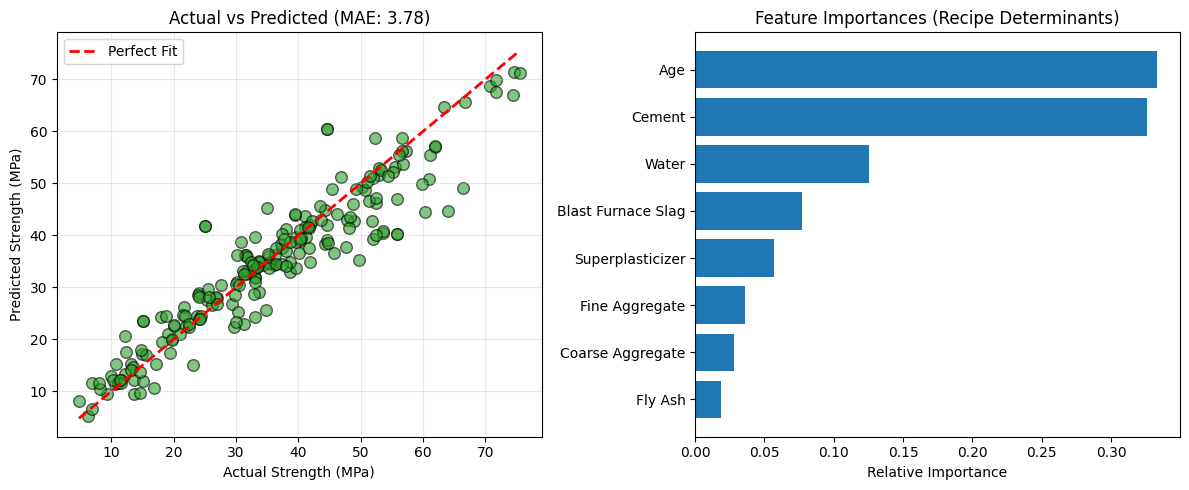

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# --- 1. LOAD DATA ---
# Renaming source variable to 'df_research' instead of kaggle
df_research = pd.read_csv("Data/zainfaisal_pakistan_concrete_data.csv")

# --- 2. PREPROCESSING ---
# Clean column names (remove extra spaces often found in CSV headers)
df_research.columns = df_research.columns.str.strip()

# Define Features (X) and Target (y)
# We use ALL recipe columns plus Age
feature_cols = [
    'Cement', 
    'Blast Furnace Slag', 
    'Fly Ash', 
    'Water', 
    'Superplasticizer', 
    'Coarse Aggregate', 
    'Fine Aggregate', 
    'Age'  # Crucial predictor for strength
]

X = df_research[feature_cols]
y = df_research['Strength']

# Split Data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. TRAIN RANDOM FOREST MODEL ---
print("="*40)
print("   TRAINING RESEARCH MODEL (RF)")
print("="*40)

# Initialize Random Forest with robust parameters
# n_estimators=200 ensures stability
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# --- 4. EVALUATION ---
predictions = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nModel Performance on Test Set:")
print(f"   > Mean Absolute Error (MAE): {mae:.2f} MPa")
print(f"   > R-Squared Score (R2): {r2:.4f}")

# --- 5. VISUALIZATION ---
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, color='#2ca02c', alpha=0.6, edgecolors='k', s=70)
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title(f"Actual vs Predicted (MAE: {mae:.2f})")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Feature Importance
# This is very useful for your FYP report to explain WHICH ingredients matter most
plt.subplot(1, 2, 2)
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances (Recipe Determinants)')
plt.barh(range(len(indices)), importances[indices], color='#1f77b4', align='center')
plt.yticks(range(len(indices)), [feature_cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()

plt.show()